In [61]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import sklearn

In [62]:
data= pd.read_csv("fake_job_postings.csv")

In [63]:
data.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


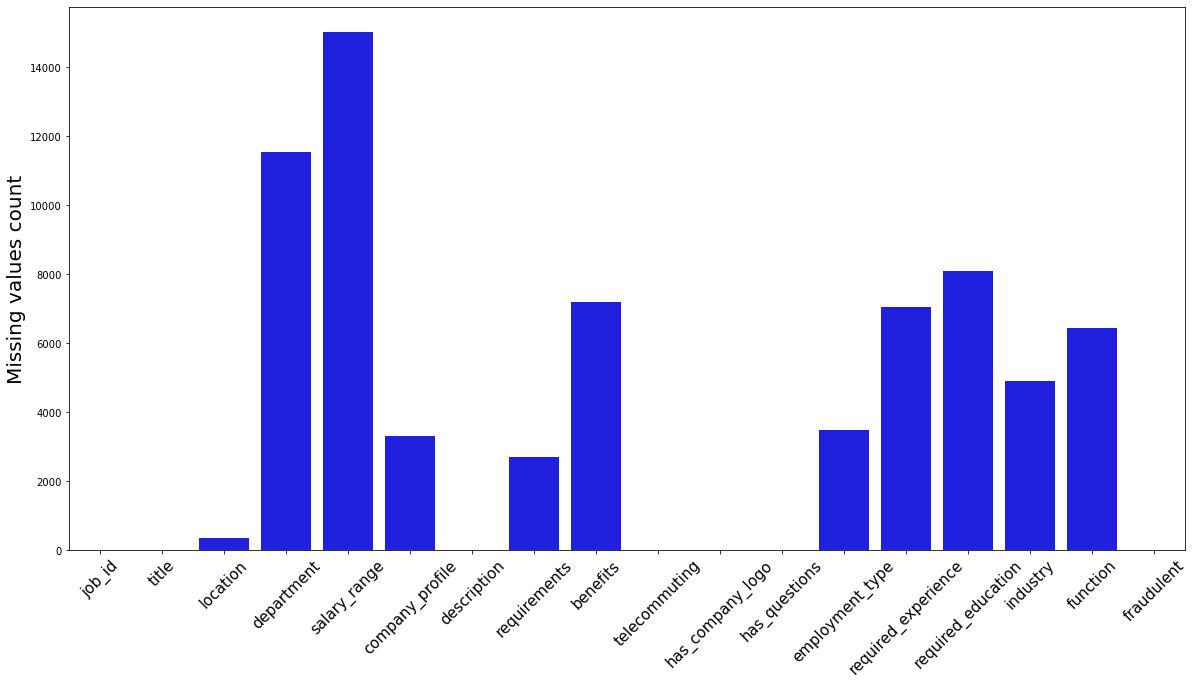

In [64]:
#check null.
null_values = data.isnull().sum()
plt.figure(figsize = (20,10))
sns.barplot(null_values.index, null_values, color = 'blue')
# plt.suptitle('Missing values in the dataset', size = 20)
plt.ylabel('Missing values count', size = 20)
plt.xticks(rotation = '45', fontsize=15)
plt.show()

In [65]:
#Check unique values
categorical_columns = []
for col in data.columns:
    print(f'Unique observations in {col}:', data[col].nunique())
    if data[col].nunique() < 14:
        categorical_columns.append(col)
print('Categorical columns:',categorical_columns)

Unique observations in job_id: 17880
Unique observations in title: 11231
Unique observations in location: 3105
Unique observations in department: 1337
Unique observations in salary_range: 874
Unique observations in company_profile: 1709
Unique observations in description: 14801
Unique observations in requirements: 11968
Unique observations in benefits: 6205
Unique observations in telecommuting: 2
Unique observations in has_company_logo: 2
Unique observations in has_questions: 2
Unique observations in employment_type: 5
Unique observations in required_experience: 7
Unique observations in required_education: 13
Unique observations in industry: 131
Unique observations in function: 37
Unique observations in fraudulent: 2
Categorical columns: ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'fraudulent']


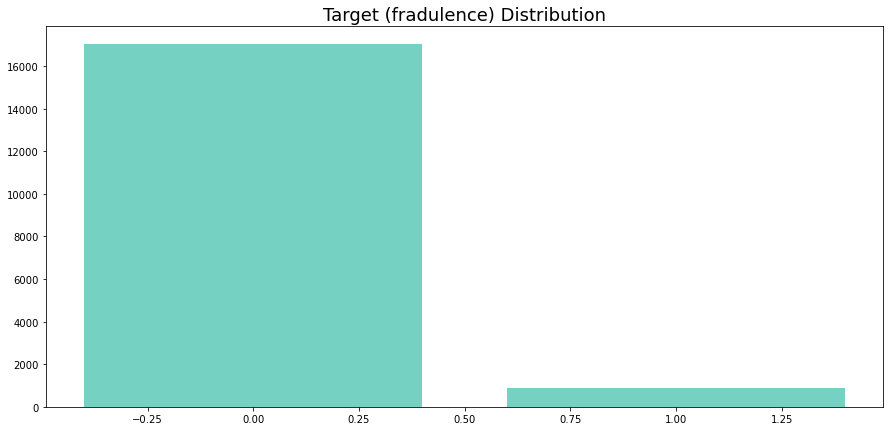

In [66]:
#Check target value
figure = plt.figure(figsize = (15,7))
target_dist = data['fraudulent'].value_counts()
plt.bar(target_dist.index, target_dist, color=(0.1, 0.7, 0.6, 0.6))
plt.title('Target (fradulence) Distribution', size = 18)
plt.show()

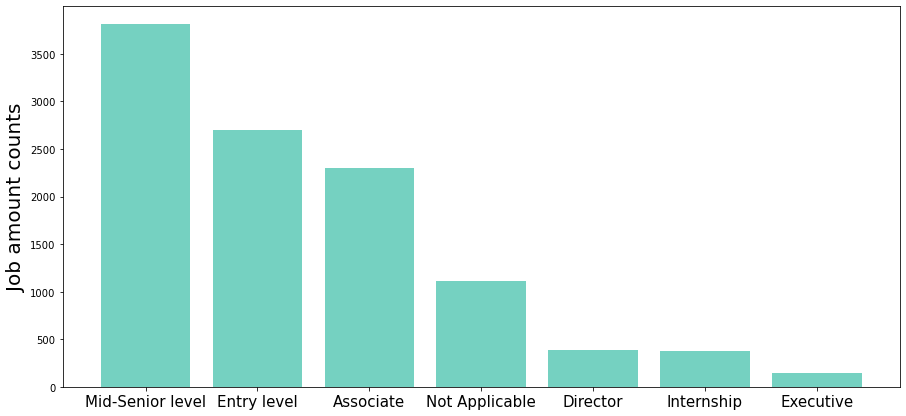

In [67]:
#Check required experience and related job posts amounts
experience = dict(data.required_experience.value_counts())
figure = plt.figure(figsize = (15,7))
plt.bar(experience.keys(), experience.values(),color=(0.1, 0.7, 0.6, 0.6))
# plt.title('Number of job postings in different required experience', size=20)
# plt.xlabel('Previous experience', size=10)
plt.ylabel('Job amount counts', size=20)
plt.xticks(size=15)
plt.show()

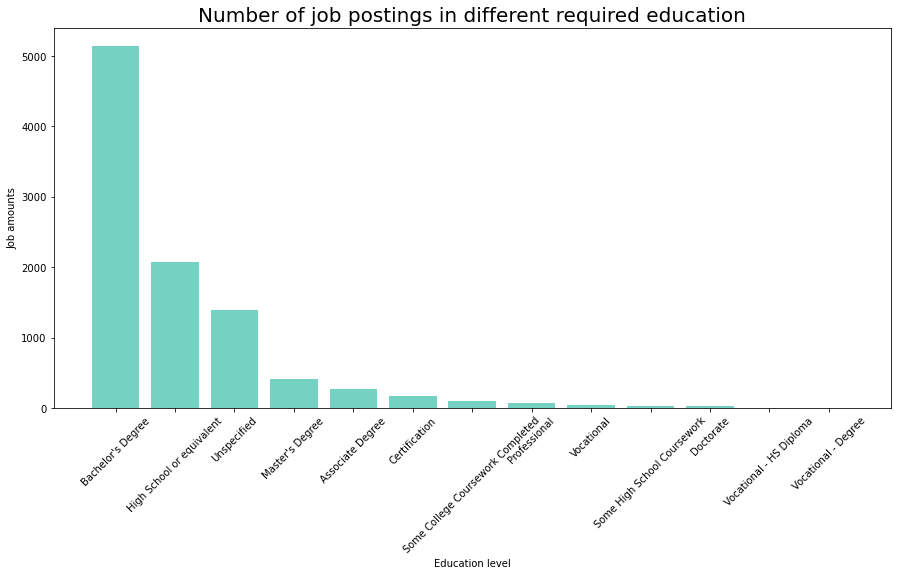

In [68]:
#Check required education and related job posts amounts
experience = dict(data.required_education.value_counts())
figure = plt.figure(figsize = (15,7))
plt.bar(experience.keys(), experience.values(),color=(0.1, 0.7, 0.6, 0.6))
plt.title('Number of job postings in different required education', size=20)
plt.xlabel('Education level', size=10)
plt.ylabel('Job amounts', size=10)
plt.xticks(rotation=45)
plt.show()

In [69]:
#fill NA values with empty strings
data.location.fillna(' ', inplace=True)

Text(0, 0.5, 'Job amounts')

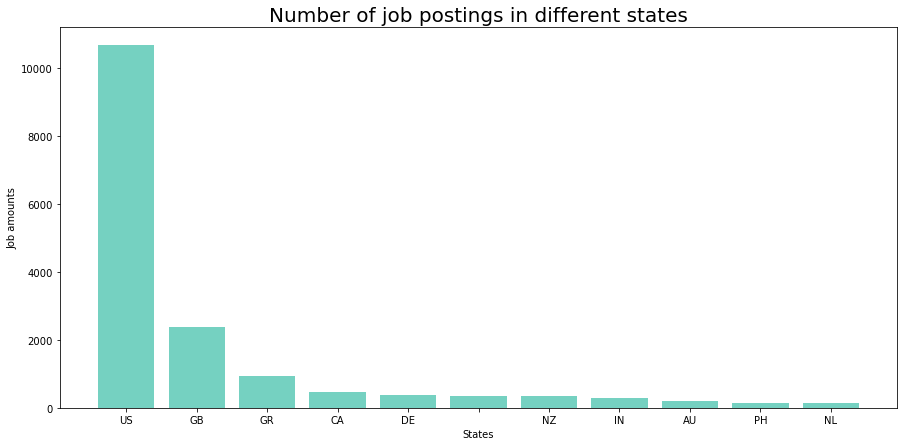

In [70]:
#check job post in different states

#helper function to split the string and locate the state values
def split(location):
    l = location.split(',')
    return l[0]

state = dict(data.location.apply(split).value_counts()[:11])
plt.figure(figsize=(15,7))
plt.title('Number of job postings in different states', size=20)
plt.bar(state.keys(), state.values(), color=(0.1, 0.7, 0.6, 0.6))
plt.xlabel('States', size=10)
plt.ylabel('Job amounts', size=10)

In [71]:
data['text']=data['title']+' '+data['location']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']

data.text.fillna(' ', inplace=True)

fraudjobs_text = data[data.fraudulent==0].text

In [72]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
default_stemmer = PorterStemmer()
default_stopwords = stopwords.words('english')
default_tokenizer=RegexpTokenizer(r"\w+")

from wordcloud import WordCloud
from imblearn.combine import SMOTETomek
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import re 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


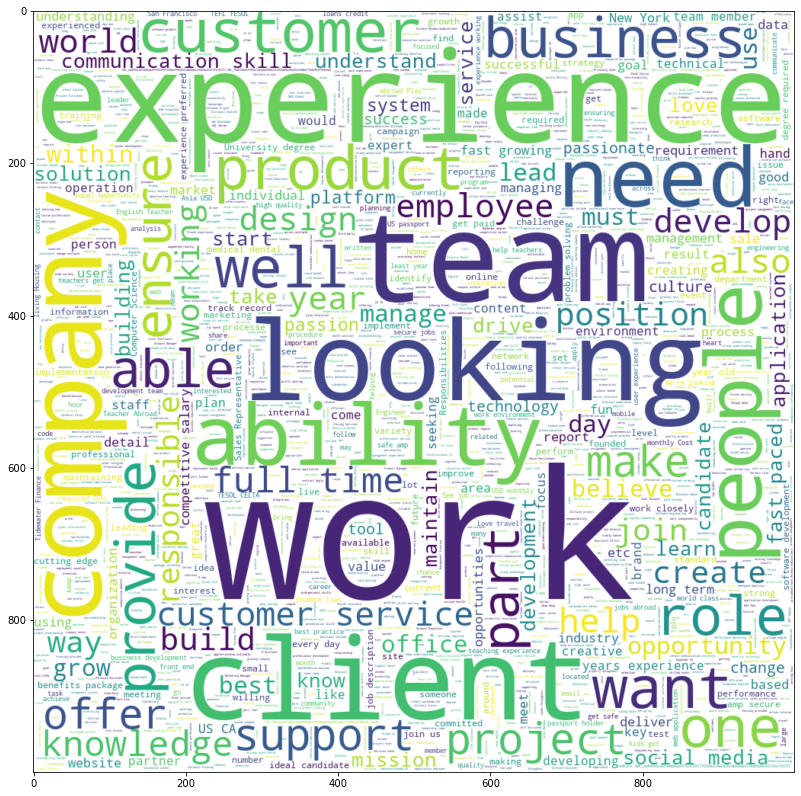

In [73]:
plt.figure(figsize = (16,14))
wc = WordCloud(background_color='white', min_font_size = 3,  max_words = 3000 , width = 1000 , height = 1000 , stopwords = stop_words).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

In [74]:
columns=['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'salary_range', 'employment_type']

#drop unrelated features
data = data.drop(labels=columns,axis=1)

data.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,text
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Internship,NaN,NaN,Marketing,0,
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,"Customer Service - Cloud Video Production NZ, ..."
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,0,
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,"Account Executive - Washington DC US, DC, Wash..."
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,"Bill Review Manager US, FL, Fort Worth SpotSou..."


In [75]:
#fill Nah
data.fillna(' ', inplace=True)

In [76]:
#merge the title, location, profile, description, requirements into a mega text column

data['text']=data['title']+' '+data['location']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']

df = data[['text','fraudulent']]

In [77]:
#downsampling the non-fraudulent to 1000

df1 = df[df['fraudulent']==0]
df1 = df1.sample(2000)

df2 = df[df['fraudulent']==1]

df_balanced = pd.concat([df1,df2],axis=0)

df_balanced = df_balanced.sample(frac=1) #shuffle all rows

In [78]:
import string
from spacy.lang.en import English
from sklearn.base import TransformerMixin
import joblib

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from imblearn.combine import SMOTETomek
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from spacy.lang.en.examples import sentences 

In [86]:
# spacy tokenizer
punctuations = string.punctuation

# Create  list of stopwords
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS
parser = English()

def spacy_tokenizer(sentence):

    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]
    return mytokens

# Custom cleanning class
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

def clean_text(text):
 return text.strip().lower()

OSError: [E941] Can't find model 'en'. It looks like you're trying to load a model from a shortcut, which is obsolete as of spaCy v3.0. To load the model, use its full name instead:

nlp = spacy.load("en_core_web_sm")

For more details on the available models, see the models directory: https://spacy.io/models. If you want to create a blank model, use spacy.blank: nlp = spacy.blank("en")

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# creating bag of words
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,2))
bow_vector

CountVectorizer(ngram_range=(1, 2),
                tokenizer=<function spacy_tokenizer at 0x0000015FEEE311F0>)

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced.text, df_balanced.fraudulent, test_size=0.2)

In [83]:
X_train

8493     Controller US, CA, Gardena PROSULTING IS PEOPL...
5567     Process Safety Engineer US, CA, Bakersfield Pr...
17749    Administrative/Receptionist - $19.25/hr US, IN...
13116    Operations Manager GB, ,  HGS is a world leade...
11756    UST Testing Technician III US, CA, Bakersfield...
                               ...                        
2998     Marketing Content Manager US, TX, Austin Why C...
17733    Payroll Processor Entry Clerk Position - $50/H...
4555     Recruiter - Writer Relations GB, LND, London  ...
4275     Account Manager US, NY, New York We’re always ...
17373    Beauty & Fragrance consultants needed GB, , Ux...
Name: text, Length: 2292, dtype: object

In [84]:
X_test

5250     Cotillion Ballroom Dance Instructor US, TX, Ho...
17748    Administrative US, NY, New York   Preparation ...
5870     Receptionist Office Asst. US, FL, Jacksonville...
2861     Frontend UX / Magento Themes Developer (3 mont...
17306    Project Coordinator GB, LND, London Acknowledg...
                               ...                        
11859    Ad Operations Manager RU, MOW, Moscow GetInten...
17667    Quant Analyst  GB, LND, London   Our client is...
7918     UI / UX Front end Developer GR, I, Kifissia   ...
127      Pharmaceutical / Compound Sales Representative...
13632    Java ATG Developer US, CA, Irvine   Position: ...
Name: text, Length: 574, dtype: object

In [85]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(class_weight = 'balanced')

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', clf)])

# fitting our model.
pipe.fit(X_train,y_train)

ValueError: empty vocabulary; perhaps the documents only contain stop words